In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout

In [14]:
# Carregando Dados
data_dir = './data'

# Configurações
batch_size = 32
img_height = 180
img_width = 180
num_classes = 2
epochs = 25


# Gerador de dados
# Treinamento
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Teste
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 20 files belonging to 2 classes.
Using 16 files for training.


Found 20 files belonging to 2 classes.
Using 4 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['cachorro', 'gato']


In [9]:
# Modelo
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compilar
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7500 - val_loss: 1.8902
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 9.4622e-04 - val_accuracy: 0.5000 - val_loss: 1.9289
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 9.1996e-04 - val_accuracy: 0.5000 - val_loss: 2.0873
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 6.3434e-04 - val_accuracy: 0.5000 - val_loss: 2.3702
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 1.0000 - loss: 3.0400e-04 - val_accuracy: 0.5000 - val_loss: 2.7732
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 1.9617e-04 - val_accuracy: 0.5000 - val_loss: 3.1975
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 1.0000 - loss: 1.9129e-04 - val_accuracy: 0.5000 - val_loss: 3.5271
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 1.9138e-04 - val_

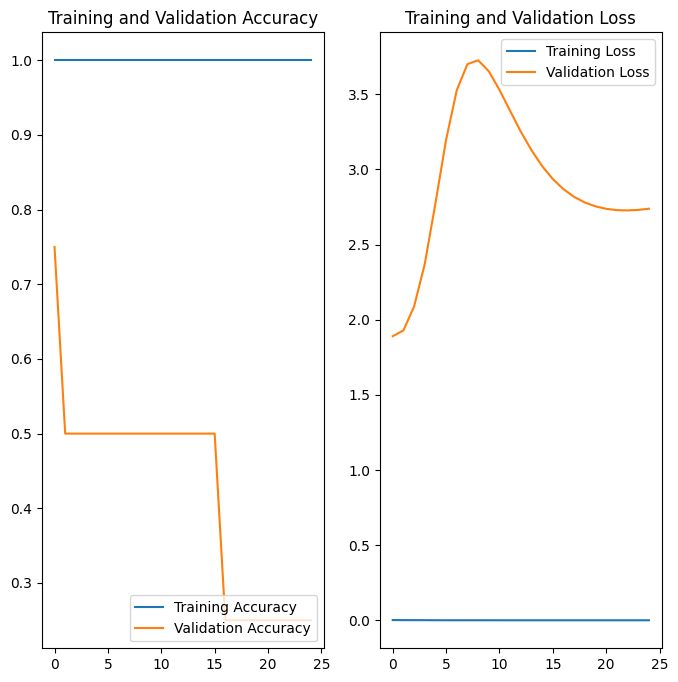

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save('meu_modelo.h5')

In [35]:
# Testando Modelo

  
# carregando modelo
model = load_model('meu_modelo.h5')
# Carregando Imagem
image_path = 'images.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("A imagem foi classificada como {} com {:.0f}% de certeza."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
A imagem foi classificada como cachorro com 100% de certeza.
